<a href="https://colab.research.google.com/github/puck-arthur/data-learning/blob/main/notebooks/week2_regression_scikit_refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 2 Milestones: Scikit-Learn & Regression

1. **Dataset Selection & Environment**  
   - Choose one of the above Kaggle datasets and download the CSV.  
   - Create a new Colab notebook: `week02_regression_models.ipynb`.  
   - Install/import: `pandas`, `numpy`, `scikit-learn`, and any plotting libs.

2. **Exploratory Data Analysis (EDA)**  
   - Inspect distributions of your target and key features.  
   - Handle missing data, outliers, and convert categorical variables (one-hot/dummy).

3. **Feature Preparation & Scaling**  
   - Select 5–10 predictors (numeric & encoded categorical).  
   - Apply **StandardScaler** or **MinMaxScaler** as needed.

4. **Train/Test Split**  
   - Use `train_test_split` (e.g., 80/20).  
   - Ensure random seed for reproducibility.

5. **Model Building**  
   - **Linear Regression**: fit and inspect coefficients.  
   - **Decision Tree Regressor**: fit as a non-linear benchmark.  
   - *(Optional)* **RandomForest Regressor** for performance comparison.

6. **Evaluation Metrics**  
   - Compute **MAE**, **RMSE**, and **R²** on test set.  
   - Tabulate results to compare models side-by-side.

7. **Visual Diagnostics**  
   - Plot **Predicted vs. Actual** scatter.  
   - Plot **Residuals** histogram or error distribution.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-habits-vs-academic-performance


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import math

df_raw = pd.read_csv('/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv')

In [3]:
# Only parental_education_level has some null values

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df_raw.describe(include='all')

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,909,1000,1000.000000,1000,1000.000000
unique,1000,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,392,447,NaN,682,NaN
mean,NaN,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500
std,NaN,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564
min,NaN,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000
50%,NaN,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000
75%,NaN,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000


In [5]:
# Lets see what possible values some text columns might have

text_columns = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

for column_name in text_columns:
  print(df_raw[column_name].value_counts())

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
part_time_job
No     785
Yes    215
Name: count, dtype: int64
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64


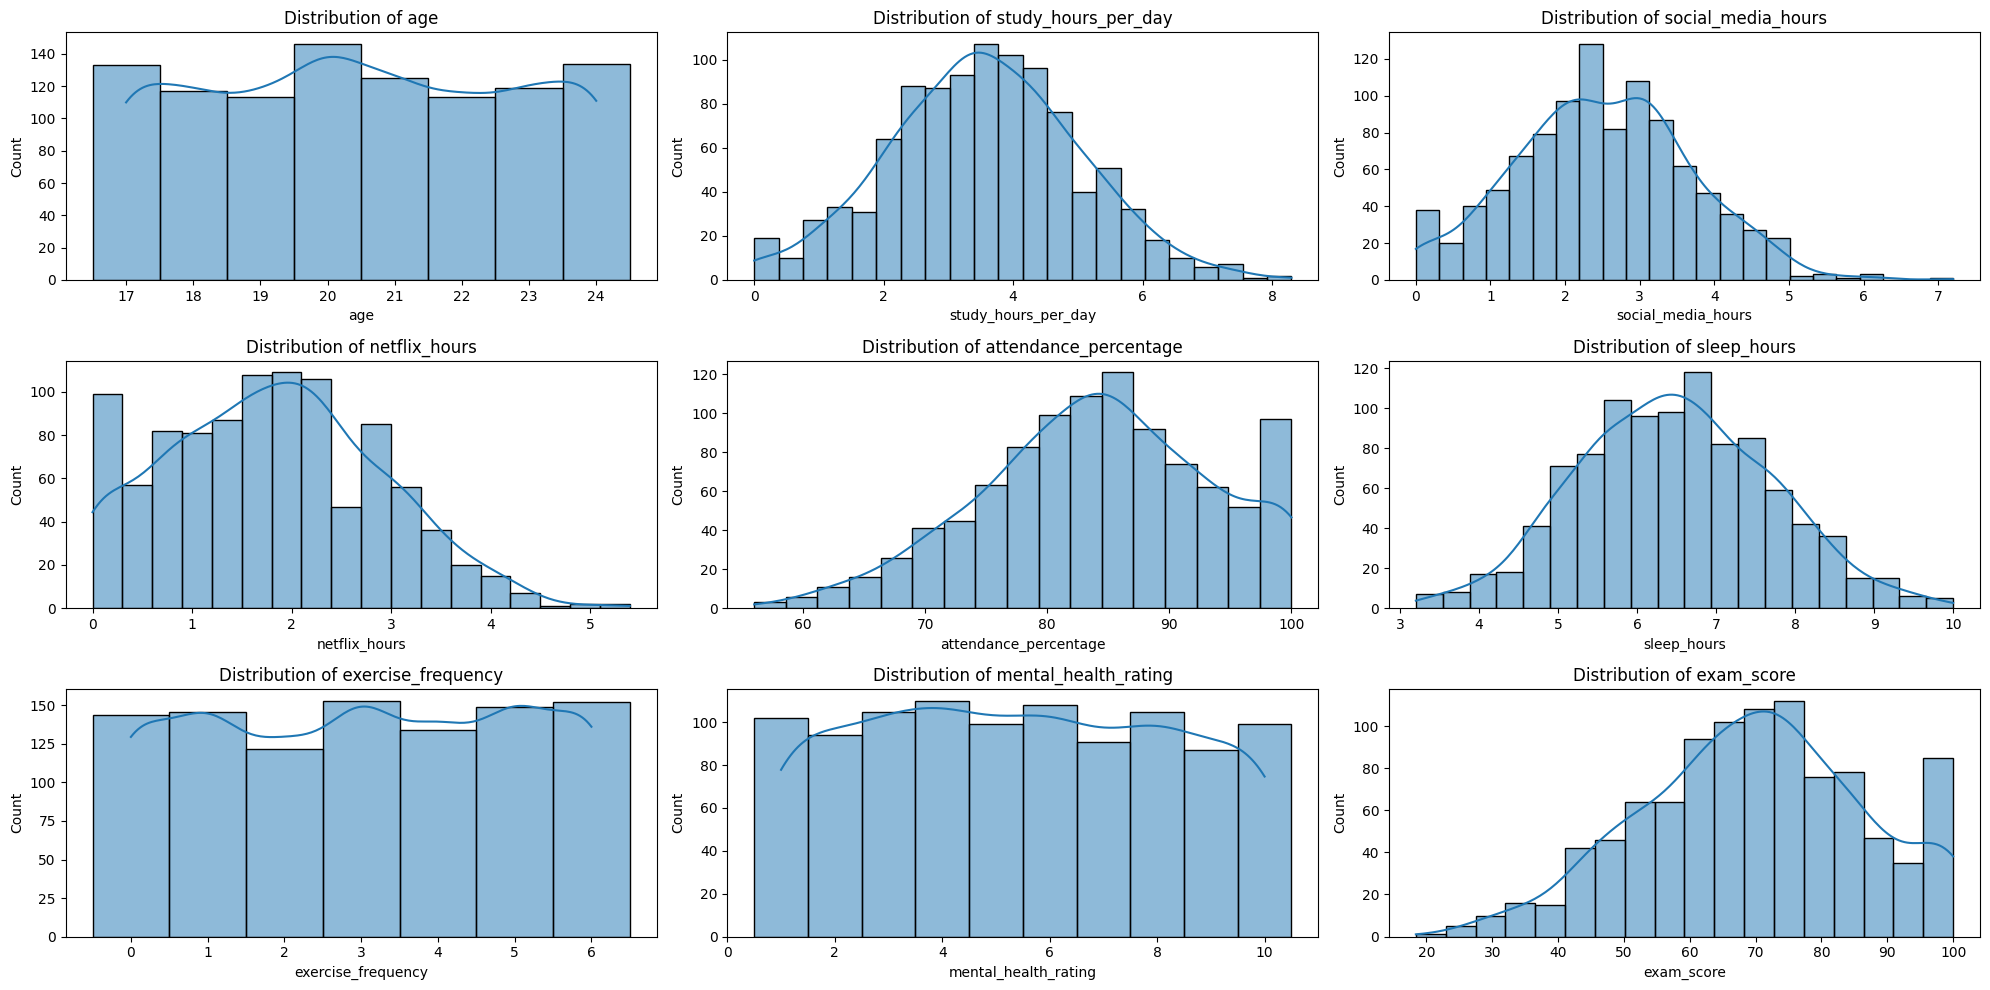

In [6]:
# Code to visualize the histogram of all numerical values in the dataframe

numeric_columns = list(df_raw.select_dtypes(include=['float64','int64']).dtypes.items()) # Tupples in the format (column_name, dtype)

num_columns = 3
num_rows = math.ceil(len(numeric_columns) / num_columns)

plt.figure(figsize=(20, 10))

i = 0

for column_name, dtype in numeric_columns:

  discrete = (dtype == 'int64') # if is integer, discrete==True

  plt.subplot(num_rows, num_columns, i + 1)
  sb.histplot(
      data=df_raw,
      x=column_name,
      kde=True,
      discrete=discrete
  )
  plt.title(f'Distribution of {column_name}')
  i+=1 # go to next item in the subplot

plt.tight_layout()
plt.show()

# Observations
1. **parental_education_level** has null values
2. **gender** has the option "Other"
3. **diet_quality** has the options "Good", "Fair" and "Poor"
4. **internet_quality** has the options "Good", "Average" and "Poor"
5. **part_time_job** and **extracurricular_participation** are both Yes/No columns that could be converted to boolean
6. **Categorical columns:** 'gender', 'diet_quality', 'parental_education_level', 'internet_quality'

In [19]:
# Separating the target variable

# Choosing some columns at random
X = df_raw[['age', 'sleep_hours', 'netflix_hours', 'study_hours_per_day', 'social_media_hours']]

y = df_raw['exam_score']

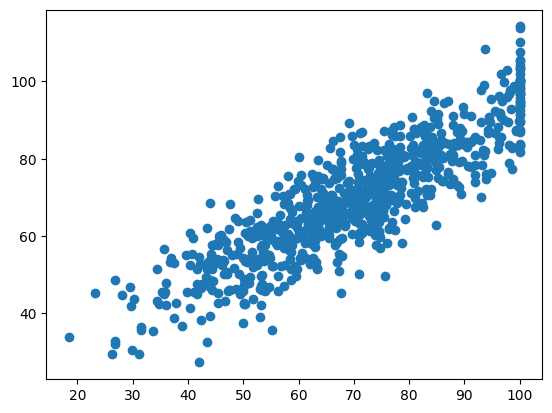

In [21]:
# First lets mantain the X data as-is and try to use ML for predictions

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

# Creating the model object
model = LinearRegression()

# Fitting to training data
model.fit(X_train, y_train)

# Predicting with test data
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)

In [13]:
# Lets change all string columns to one of these: Binary, Nominal, Ordinal with sklearn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Nominal and Binary columns
cat_cols = ['gender', 'part_time_job', 'extracurricular_participation']

# Ordinal columns
ordinal_cols = [
    "diet_quality",
    "internet_quality",
    "parental_education_level"
]

# For each, list the values in their natural order
ordinal_categories = [
    ["Poor", "Fair", "Good"], # diet_quality
    ["Poor", "Average", "Good"], # internet_quality
    ["High School", "Bachelor", "Master"] # parental_education_level
]

# 1) Define a ColumnTransformer that will OHE just the cat_cols
preprocessor = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)]
    )  # leave all other columns as-is

ohe.fit(df_raw[['gender']])

# 2) Bundle preprocessing + model into one Pipeline
model_pipe = Pipeline([
    ('pre', preprocessor),
    ('model', LinearRegression())
])

# 3) Fit on training data
model_pipe.fit(X_train, y_train)

# 4) Predict on new data—and it will automatically:
#    a) OHE your cat_cols identically to train,
#    b) pass through other columns,
#    c) feed into the regression.
preds = model_pipe.predict(X_test)


OneHotEncoder(drop='first')

In [8]:
# Checking if the parental_education_level null values has the same mean from the other categories

df.groupby('parental_education_level', dropna=False)['exam_score'].agg('mean')

,exam_score
parental_education_level,
Bachelor,70.272571
High School,69.547194
Master,68.086826
NaN,70.034066


In [9]:
# Lets change the categorical columns 'gender', 'diet_quality', 'parental_education_level', 'internet_quality' to numerical ones

